# Introduction 

This Jupyter Notebook contains analysis of Coursera Courses dataset. Herein the notebook will provide and describe steps of data cleaning, exploratory data analysis, visualizations, some comparisons and finalise with giving improvements to be done.

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import itertools
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls

README.md                       coursera_courses_analysis.ipynb
coursea_data.csv


# Loading Coursera data

In [3]:
# Importing the coursera data

coursera_data = pd.read_csv('./coursea_data.csv', sep=',', index_col=0)
coursera_data.head()

course_title  \
134  (ISC)² Systems Security Certified Practitioner...   
743  A Crash Course in Causality:  Inferring Causal...   
874                     A Crash Course in Data Science   
413                            A Law Student's Toolkit   
635                A Life of Happiness and Fulfillment   

            course_organization course_Certificate_type  course_rating  \
134                      (ISC)²          SPECIALIZATION            4.7   
743  University of Pennsylvania                  COURSE            4.7   
874    Johns Hopkins University                  COURSE            4.5   
413             Yale University                  COURSE            4.7   
635   Indian School of Business                  COURSE            4.8   

    course_difficulty course_students_enrolled  
134          Beginner                     5.3k  
743      Intermediate                      17k  
874             Mixed                     130k  
413             Mixed                      91k  
635             Mixed                     320k

# Data cleaning

### Checking if any row of a feature is null?
In the below cell we are investigating if any value in the rows of features (any()) at a dataframe is null (isnull()). 
In the output we expect a boolean value to be False if there are no null values for the columns, otherwise if there is at least one null value - True.

In [4]:
coursera_data.isnull().any()

course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

In [5]:
coursera_data.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [6]:
coursera_data['course_Certificate_type'].unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

In [7]:
coursera_data['course_difficulty'].unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

### Checking if there are any duplicates?
In the below cell we are checking if a row across all features in a dataframe contains duplicate values. 
In the output we expect a boolean value to be False if there are no duplicated rows.

In [8]:
coursera_data.duplicated(coursera_data.columns)

134    False
743    False
874    False
413    False
635    False
       ...  
236    False
883    False
545    False
875    False
163    False
Length: 891, dtype: bool

# Exploratory Data Analysis

In the cell below we are sorting indexes and changing index values to start from 1 as well as change its column name to 'Index'

In [9]:
coursera_data.sort_index(axis=0, inplace=True)
coursera_data
coursera_data.index += 1
coursera_data.index.name = 'Index'
coursera_data.head(5)

course_title     course_organization  \
Index                                                         
1                  IBM Data Science                     IBM   
2      Introduction to Data Science                     IBM   
3         The Science of Well-Being         Yale University   
4              Python for Everybody  University of Michigan   
5                 Google IT Support                  Google   

        course_Certificate_type  course_rating course_difficulty  \
Index                                                              
1      PROFESSIONAL CERTIFICATE            4.6          Beginner   
2                SPECIALIZATION            4.6          Beginner   
3                        COURSE            4.9             Mixed   
4                SPECIALIZATION            4.8          Beginner   
5      PROFESSIONAL CERTIFICATE            4.8          Beginner   

      course_students_enrolled  
Index                           
1                         480k  
2                         310k  
3                         2.5m  
4                         1.5m  
5                         350k

### How many observations and features there are?
In the below cell we are counting row numbers of index as observations and column numbers as features. 
In the output we are displaying the number of rows (891) and columns (6). There are 891 observations and 6 features.

In [10]:
print("Observations: " + str(len(coursera_data.index)))
print("Features: " + str(len(coursera_data.columns)))
# coursera_data.shape

Observations: 891
Features: 6


### Data Pre-processing
As we see that the column 'course_students_enrolled' is of the type object. That is due to the "k" or "m" after the number. So we need to deal with that before starting any analysis and design a function to change the values to floats.

In [11]:
def value_to_float(x: float) -> float:
    """ A function to convert value to a float """
    if type(x) == float:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'b' in x:
        return float(x.replace('m', '')) * 1000000000
    return 0.0

coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].apply(value_to_float)

In [12]:
coursera_data.head()

course_title     course_organization  \
Index                                                         
1                  IBM Data Science                     IBM   
2      Introduction to Data Science                     IBM   
3         The Science of Well-Being         Yale University   
4              Python for Everybody  University of Michigan   
5                 Google IT Support                  Google   

        course_Certificate_type  course_rating course_difficulty  \
Index                                                              
1      PROFESSIONAL CERTIFICATE            4.6          Beginner   
2                SPECIALIZATION            4.6          Beginner   
3                        COURSE            4.9             Mixed   
4                SPECIALIZATION            4.8          Beginner   
5      PROFESSIONAL CERTIFICATE            4.8          Beginner   

       course_students_enrolled  
Index                            
1                      480000.0  
2                      310000.0  
3                     2500000.0  
4                     1500000.0  
5                      350000.0

### Which of the features are numeric?
In the cell below we are defining all columns and implementing function (_get_numeric_data()) to find numeric features. 
In the output we are getting these numeric features: 'course_rating', 'course_students_enrolled'.

In [13]:
cols = coursera_data.columns
num_cols = coursera_data._get_numeric_data().columns
num_cols

# df.info()

Index(['course_rating', 'course_students_enrolled'], dtype='object')

### Which features are categorical?
In the cell below we are substracting numeric features from all columns, so in the output we get categorical features: 'course_Certificate_type', 'course_difficulty', 'course_organization', 'course_title'.

In [14]:
cat_cols = list(set(cols) - set(num_cols))
cat_cols

# df.dtypes.value_counts()

['course_Certificate_type',
 'course_organization',
 'course_title',
 'course_difficulty']

### Statistics of numeric features
Investignating numerical feature standard deviations, means, minimum value, maximum value, counts and percentiles

In [15]:
coursera_data.describe()

course_rating  course_students_enrolled
count     891.000000              8.910000e+02
mean        4.677329              9.055208e+04
std         0.162225              1.819365e+05
min         3.300000              1.500000e+03
25%         4.600000              1.750000e+04
50%         4.700000              4.200000e+04
75%         4.800000              9.950000e+04
max         5.000000              3.200000e+06

### Which organization has the most number of courses?

Herein we check two things. First, which organisation has the most number of courses on Coursera. Next, which all organisations have more than 10 courses on coursera. This is an analysis to show which organisations dominate on Coursera.

In [16]:
def find_organisation_greater_than_ten(data: pd.DataFrame) -> pd.DataFrame:
    """Returns a dataframe with course_organization and number of courses more than 10"""
    dict = {}
    course_org = coursera_data['course_organization'].to_list()
    for org in course_org:
        if org in dict:
            dict[org] += 1
        else:
            dict[org] = 1
    orgs = []
    counts = []
    for key, value in dict.items():
        if value > 10:
            orgs.append(key)
            counts.append(value)
        else:
            continue
    course_organisation_greater_than_10 = pd.DataFrame({'course_organization':orgs, 'count':counts})
    course_organisation_greater_than_10.sort_values(by='count', ascending=False, inplace=True)
    return course_organisation_greater_than_10

# Alternative way:
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].str.replace('k','*1000')
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].str.replace('m','*1000000')
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].map(lambda x: eval(x))

In [17]:
coursera_data.head()

course_title     course_organization  \
Index                                                         
1                  IBM Data Science                     IBM   
2      Introduction to Data Science                     IBM   
3         The Science of Well-Being         Yale University   
4              Python for Everybody  University of Michigan   
5                 Google IT Support                  Google   

        course_Certificate_type  course_rating course_difficulty  \
Index                                                              
1      PROFESSIONAL CERTIFICATE            4.6          Beginner   
2                SPECIALIZATION            4.6          Beginner   
3                        COURSE            4.9             Mixed   
4                SPECIALIZATION            4.8          Beginner   
5      PROFESSIONAL CERTIFICATE            4.8          Beginner   

       course_students_enrolled  
Index                            
1                      480000.0  
2                      310000.0  
3                     2500000.0  
4                     1500000.0  
5                      350000.0

## Visualizing the data


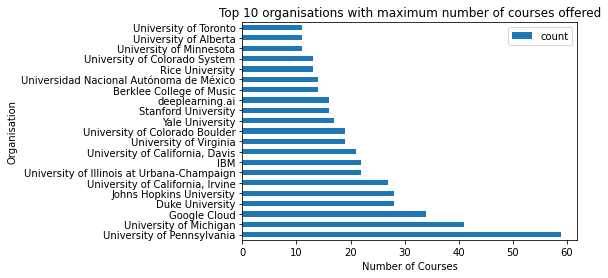

In [18]:
# Plotting a barh chart
course_organisation_greater_than_10 = find_organisation_greater_than_ten(coursera_data)
course_organisation_greater_than_10.plot(kind='barh', x='course_organization', y='count')
# plt.style.use('classic')
plt.title('Top 10 organisations with maximum number of courses offered')
plt.xlabel('Number of Courses')
plt.ylabel('Organisation')
plt.show()

University of Pennsylvania dominates here, with just about 60 courses, followed by University of Michigan who has just over 40 courses on Coursera!

### Looking at average course rating of the organisations with more than 10 courses
We invest see whether these organisations produce quality courses or is it just quantity over quality?

In [19]:
# dictionary containing organisation as key and avg rating as value
dom_dict = round(coursera_data.groupby('course_organization')['course_rating'].mean(), 1).to_dict()

In [20]:
# Filter out organisations, as we only want those organizations with more than 10 courses
orgs = course_organisation_greater_than_10['course_organization'].to_list()
avg_rating = []
for org in orgs:
    for key, value in dom_dict.items():
        if key == org:
            avg_rating.append(value)
        else:
            continue
course_organisation_greater_than_10['avg_rating'] = avg_rating

In [21]:
course_organisation_greater_than_10
# course_organization_greater_than_10.groupby(['course_organization'])['avg_rating'].aggregate('max').sort_values(ascending=False)

course_organization  count  avg_rating
5                   University of Pennsylvania     59         4.7
2                       University of Michigan     41         4.7
6                                 Google Cloud     34         4.6
10                             Duke University     28         4.7
7                     Johns Hopkins University     28         4.7
9             University of California, Irvine     27         4.6
8   University of Illinois at Urbana-Champaign     22         4.7
0                                          IBM     22         4.6
14             University of California, Davis     21         4.6
12                      University of Virginia     19         4.7
17              University of Colorado Boulder     19         4.7
1                              Yale University     17         4.8
4                          Stanford University     16         4.8
3                              deeplearning.ai     16         4.7
15                    Berklee College of Music     14         4.8
20     Universidad Nacional Autónoma de México     14         4.7
16                             Rice University     13         4.7
19               University of Colorado System     13         4.7
11                     University of Minnesota     11         4.6
13                       University of Alberta     11         4.7
18                       University of Toronto     11         4.6

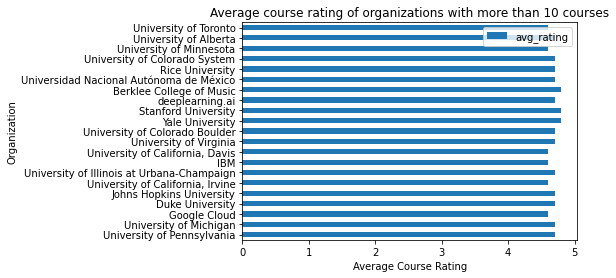

In [22]:
# Plotting a barh chart of organisations with more than 10 courses under its belt
course_organisation_greater_than_10.plot(kind='barh', x='course_organization', y='avg_rating')
plt.title('Average course rating of organizations with more than 10 courses')
plt.xlabel('Average Course Rating')
plt.ylabel('Organization')
plt.show()

As we see, there is very little difference between the average course rating of all these organisations. Hence, they don't focus on just quantity.

### Which organisation has the highest course rating?

In [23]:
dom_dict = round(coursera_data.groupby('course_organization')['course_rating'].mean(), 1).to_dict()
dom_dict = {k: v for k, v in sorted(dom_dict.items(), key=lambda item: item[1], reverse=True)}
dom_dict

{'Crece con Google': 4.9,
 'Google - Spectrum Sharing': 4.9,
 'Hebrew University of Jerusalem': 4.9,
 'London Business School': 4.9,
 'Nanyang Technological University, Singapore': 4.9,
 'ScrumTrek': 4.9,
 'Universidade Estadual de Campinas': 4.9,
 'Universidade de São Paulo': 4.9,
 'American Museum of Natural History': 4.8,
 'Arizona State University': 4.8,
 'Atlassian': 4.8,
 'Autodesk': 4.8,
 'BCG': 4.8,
 'Berklee College of Music': 4.8,
 'Cloudera': 4.8,
 'Columbia University': 4.8,
 'ESADE Business and Law School': 4.8,
 'Eindhoven University of Technology': 4.8,
 'Institute for the Future': 4.8,
 'Kalshoven-Gieskes Forum': 4.8,
 'Ludwig-Maximilians-Universität München (LMU)': 4.8,
 'Macquarie University': 4.8,
 'McMaster University': 4.8,
 'Osmosis': 4.8,
 'Peking University': 4.8,
 'Relay Graduate School of Education': 4.8,
 'SAS': 4.8,
 'Shanghai Jiao Tong University': 4.8,
 'Stanford University': 4.8,
 'Tel Aviv University': 4.8,
 'The George Washington University': 4.8,
 'The

In [24]:
for key, value in dom_dict.items():
    if value == 4.9:
        print(key)

Crece con Google
Google - Spectrum Sharing
Hebrew University of Jerusalem
London Business School
Nanyang Technological University, Singapore
ScrumTrek
Universidade Estadual de Campinas
Universidade de São Paulo


As you can see, none of these organisations belong to that group who have more than 10 courses.

### Number of courses for different ratings

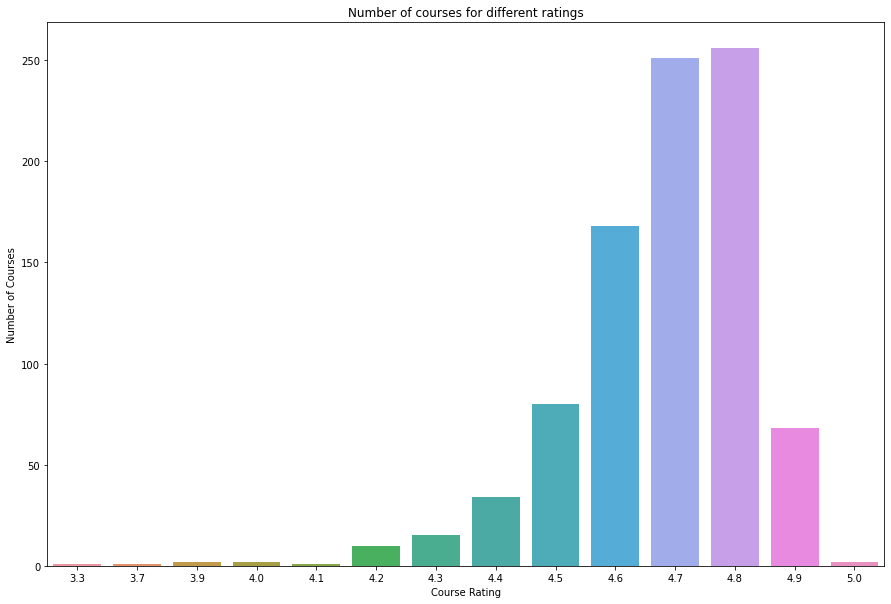

In [25]:
plt.figure(figsize=(15,10)) 
# sns.set_style(style='white') 
sns.countplot(x='course_rating', data=coursera_data)
plt.xlabel('Course Rating')
plt.ylabel('Number of Courses')
plt.title('Number of courses for different ratings');

### Top 10 courses on Coursera
Let's look at the top 10 courses on Coursera by course rating

In [26]:
course_dict = coursera_data.groupby('course_title')['course_rating'].mean().to_dict()
course_dict = {k: v for k, v in sorted(course_dict.items(), key=lambda item: item[1], reverse=True)}
course_dict

{'El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho': 5.0,
 'Infectious Disease Modelling': 5.0,
 'Agile и Scrum в работе над проектами и продуктами': 4.9,
 'American Contract Law I': 4.9,
 'Aprendiendo a aprender: Poderosas herramientas mentales con las que podrás dominar temas difíciles (Learning How to Learn)': 4.9,
 'Arizona State University TESOL': 4.9,
 'Aspectos básicos de la planificación y la gestión de proyectos': 4.9,
 'Become a CBRS Certified Professional Installer by Google': 4.9,
 'Boosting Creativity for Innovation': 4.9,
 'Brand Management: Aligning Business, Brand and Behaviour': 4.9,
 'Bugs 101: Insect-Human Interactions': 4.9,
 'Build a Modern Computer from First Principles: From Nand to Tetris (Project-Centered Course)': 4.9,
 'COVID-19 Contact Tracing': 4.9,
 'Compassionate Leadership Through Service Learning with Jane Goodall and Roots & Shoots': 4.9,
 'Convolutional Neural Networks': 4.9,
 'Discrete Optimization': 4.9,
 'Diseño y Creación d

In [27]:
course_df = pd.DataFrame({'course_title':list(course_dict.keys()), 'course_rating':list(course_dict.values())})
course_df[:10]

course_title  course_rating
0  El Abogado del Futuro: Legaltech y la Transfor...            5.0
1                       Infectious Disease Modelling            5.0
2  Agile и Scrum в работе над проектами и продуктами            4.9
3                            American Contract Law I            4.9
4  Aprendiendo a aprender: Poderosas herramientas...            4.9
5                     Arizona State University TESOL            4.9
6  Aspectos básicos de la planificación y la gest...            4.9
7  Become a CBRS Certified Professional Installer...            4.9
8                 Boosting Creativity for Innovation            4.9
9  Brand Management: Aligning Business, Brand and...            4.9

### Does course difficulty affect number of students enrolled?
For this we will check the total and average number of students enrolled while grouping by difficulty.

In [28]:
# Finding the total students enrolled for each course difficulty category

df = pd.DataFrame({'total_students_enrolled' : coursera_data.groupby('course_difficulty').sum()['course_students_enrolled']}).reset_index()
df

course_difficulty  total_students_enrolled
0          Advanced                1264400.0
1          Beginner               39921800.0
2      Intermediate               14506300.0
3             Mixed               24989400.0

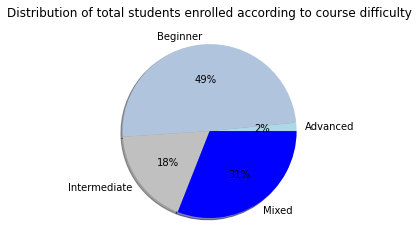

In [29]:
my_colors = ['lightblue','lightsteelblue','silver','blue']
plt.pie(df['total_students_enrolled'],labels=df['course_difficulty'],autopct='%1.0f%%',shadow = True, colors=my_colors)
plt.title('Distribution of total students enrolled according to course difficulty')
plt.show();

In [30]:
import plotly.express as px
fig = px.sunburst(coursera_data, path=['course_difficulty', 'course_organization'],values='course_rating')
fig.show()

In [31]:
# Finding the average students enrolled for each course difficulty category

stud_dict = round(coursera_data.groupby('course_difficulty')['course_students_enrolled'].mean(), 0).to_dict()
stud_dict = {k: v for k, v in sorted(stud_dict.items(), key=lambda item: item[1], reverse=True)}
stud_dict

{'Mixed': 133633.0,
 'Beginner': 81975.0,
 'Intermediate': 73264.0,
 'Advanced': 66547.0}

In [32]:
diff_stud = pd.DataFrame({'difficulty':list(stud_dict.keys()), 'avg_students':list(stud_dict.values())})
diff_stud

difficulty  avg_students
0         Mixed      133633.0
1      Beginner       81975.0
2  Intermediate       73264.0
3      Advanced       66547.0

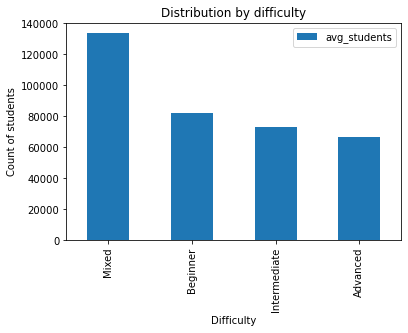

In [33]:
diff_stud.plot(kind='bar', x='difficulty', y='avg_students', title='Distribution by difficulty')
# plt.style.use('classic')
plt.title('Distribution by difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Count of students')
plt.show()

Well, there are more number of students enrolled per Mixed difficulty level course rather than Beginner or any other.

### Course distribution by difficulty
For this we will check the difficulty of courses and course certification types vs counts of courses. Also in the end we will look what words attract a user to enroll in the course.

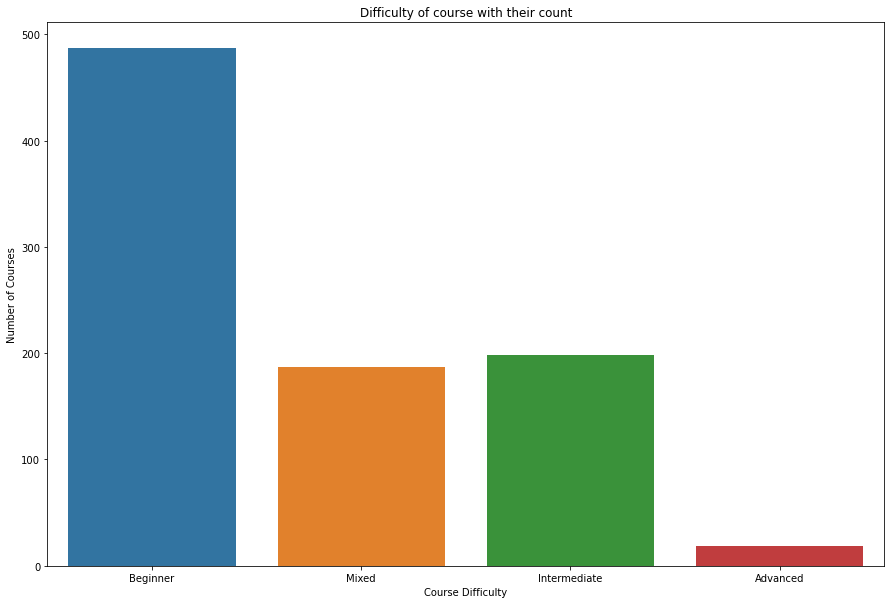

In [34]:
plt.figure(figsize=(15,10)) 
sns.countplot(x='course_difficulty', data=coursera_data)
plt.xlabel('Course Difficulty')
plt.ylabel('Number of Courses')
plt.title("Difficulty of course with their count");

# Alternative way:
# fig_dims = (10,6)
# fig,ax = plt.subplots(figsize=fig_dims)
# sns.countplot(x='course_difficulty',data = coursera_data,ax=ax);

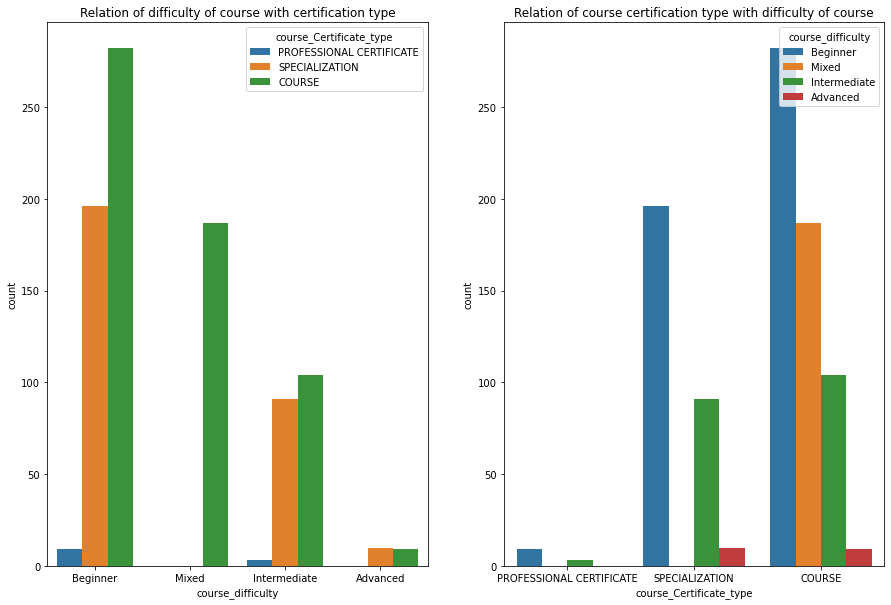

In [35]:
figure, ax =plt.subplots(1,2, figsize= (15,10))


sns.countplot(coursera_data['course_difficulty'], ax=ax[0], hue=coursera_data['course_Certificate_type'])
ax[0].set_title("Relation of difficulty of course with certification type")


sns.countplot(coursera_data['course_Certificate_type'], ax=ax[1], hue=coursera_data['course_difficulty'])
ax[1].set_title("Relation of course certification type with difficulty of course")


figure.show;

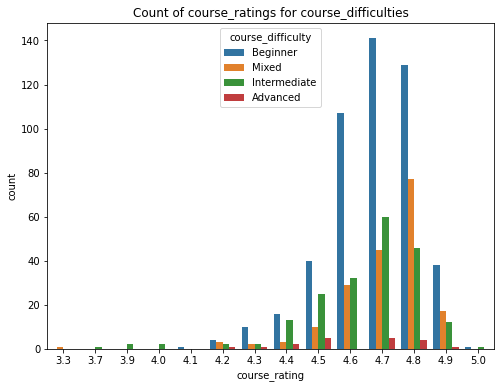

In [36]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=coursera_data,x = 'course_rating',hue= 'course_difficulty',ax=ax)
plt.title('Count of course_ratings for course_difficulties');

In [37]:
fig = px.scatter(coursera_data, x="course_difficulty", y="course_organization", 
                 color="course_rating", 
                 hover_data=['course_title', 'course_rating'])
fig.show()

Below is the word cloud that shows what words attract a student to enroll in the course.

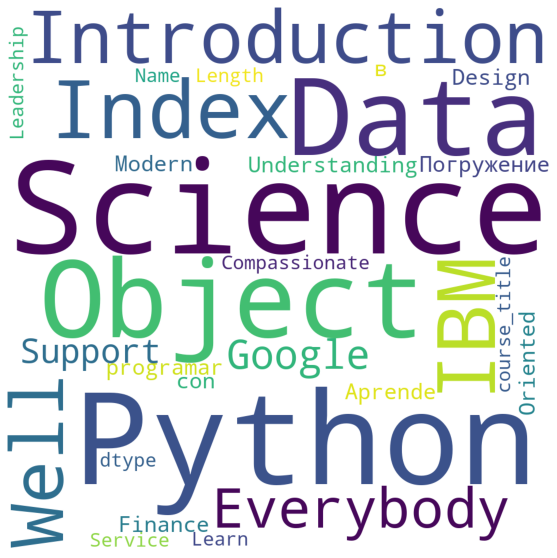

In [38]:
wordcloud = WordCloud(width = 1000, height = 1000, 
            background_color ='white', 
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(str(coursera_data['course_title']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Does course difficulty affect rating?
Do courses with advanced level of difficulty get lower rating? Is there any relation between the two?

In [39]:
rate_dict = round(coursera_data.groupby('course_difficulty')['course_rating'].mean(), 1).to_dict()
rate_dict = {k: v for k, v in sorted(rate_dict.items(), key=lambda item: item[1], reverse=True)}
rate_dict

{'Beginner': 4.7, 'Mixed': 4.7, 'Advanced': 4.6, 'Intermediate': 4.6}

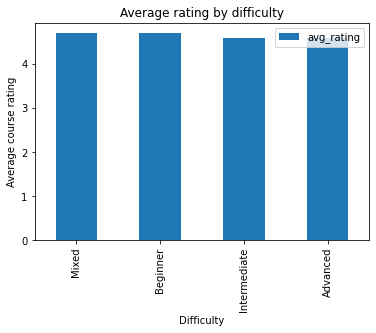

In [40]:
diff_stud['avg_rating'] = list(rate_dict.values())
diff_stud.plot(kind='bar', x='difficulty', y='avg_rating', title='Average rating by difficulty')
# plt.style.use('classic')
plt.title('Average rating by difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Average course rating')
plt.show();

Nope, very little difference in the ratings.

### Does certificate type impact number of students enrolled?
This could be a very important question for Coursera and for the organisations who are making courses. What type of certificate should be there for maximum student enrollment and how should Coursera optimize the course recommendations based on the type of certificates?

In [41]:
cert_dict = round(coursera_data.groupby('course_Certificate_type')['course_students_enrolled'].mean(), 0).to_dict()
cert_dict = {k: v for k, v in sorted(cert_dict.items(), key=lambda item: item[1], reverse=True)}
cert_dict

{'PROFESSIONAL CERTIFICATE': 190700.0,
 'SPECIALIZATION': 91792.0,
 'COURSE': 87854.0}

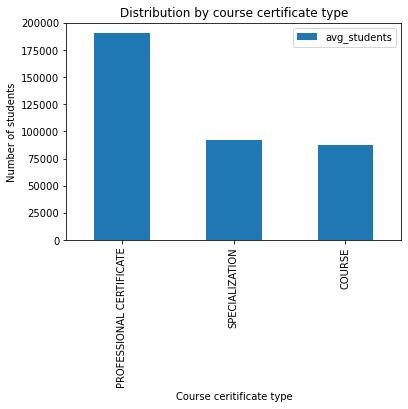

In [42]:
cert_df = pd.DataFrame({'course_Certificate_type':list(cert_dict.keys()), 'avg_students':list(cert_dict.values())})
cert_df.plot(kind='bar', x='course_Certificate_type', y='avg_students', title='Distribution by course certificate type')
plt.title('Distribution by course certificate type')
plt.xlabel('Course ceritificate type')
plt.ylabel('Number of students')
plt.show();

Yes! More number of students on an average enroll in Professional Certificate courses followed by a specialization.

### Courses distribution

How many courses are there provided by the coursera in general compared to the ones that give only specializations or professional certificates?

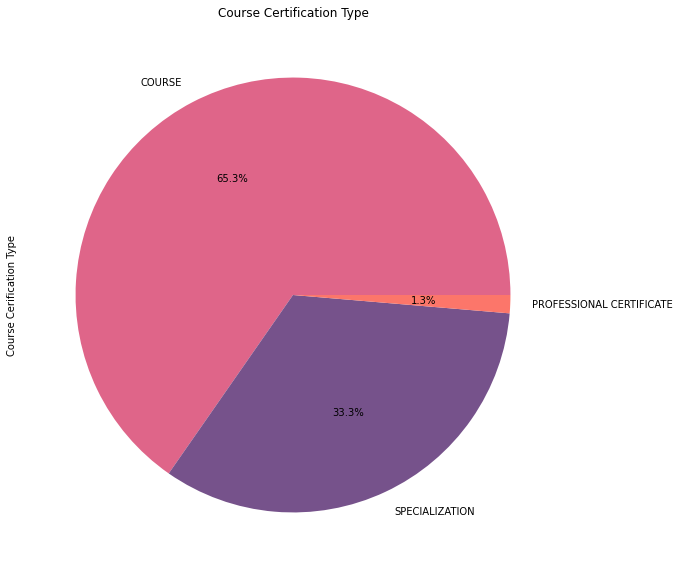

In [43]:
colors =  ["#DF6589FF", "#76528BFF","#FC766AFF"]
ax= coursera_data['course_Certificate_type'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(15, 10))
plt.title('Course Certification Type') 
plt.ylabel('Course Cerification Type')
plt.show();

It seems that there are more courses provided by the Coursera than there are courses for professional certificates, which majority of students take.


### Which courses are the most popular and how many students they have enrolled?

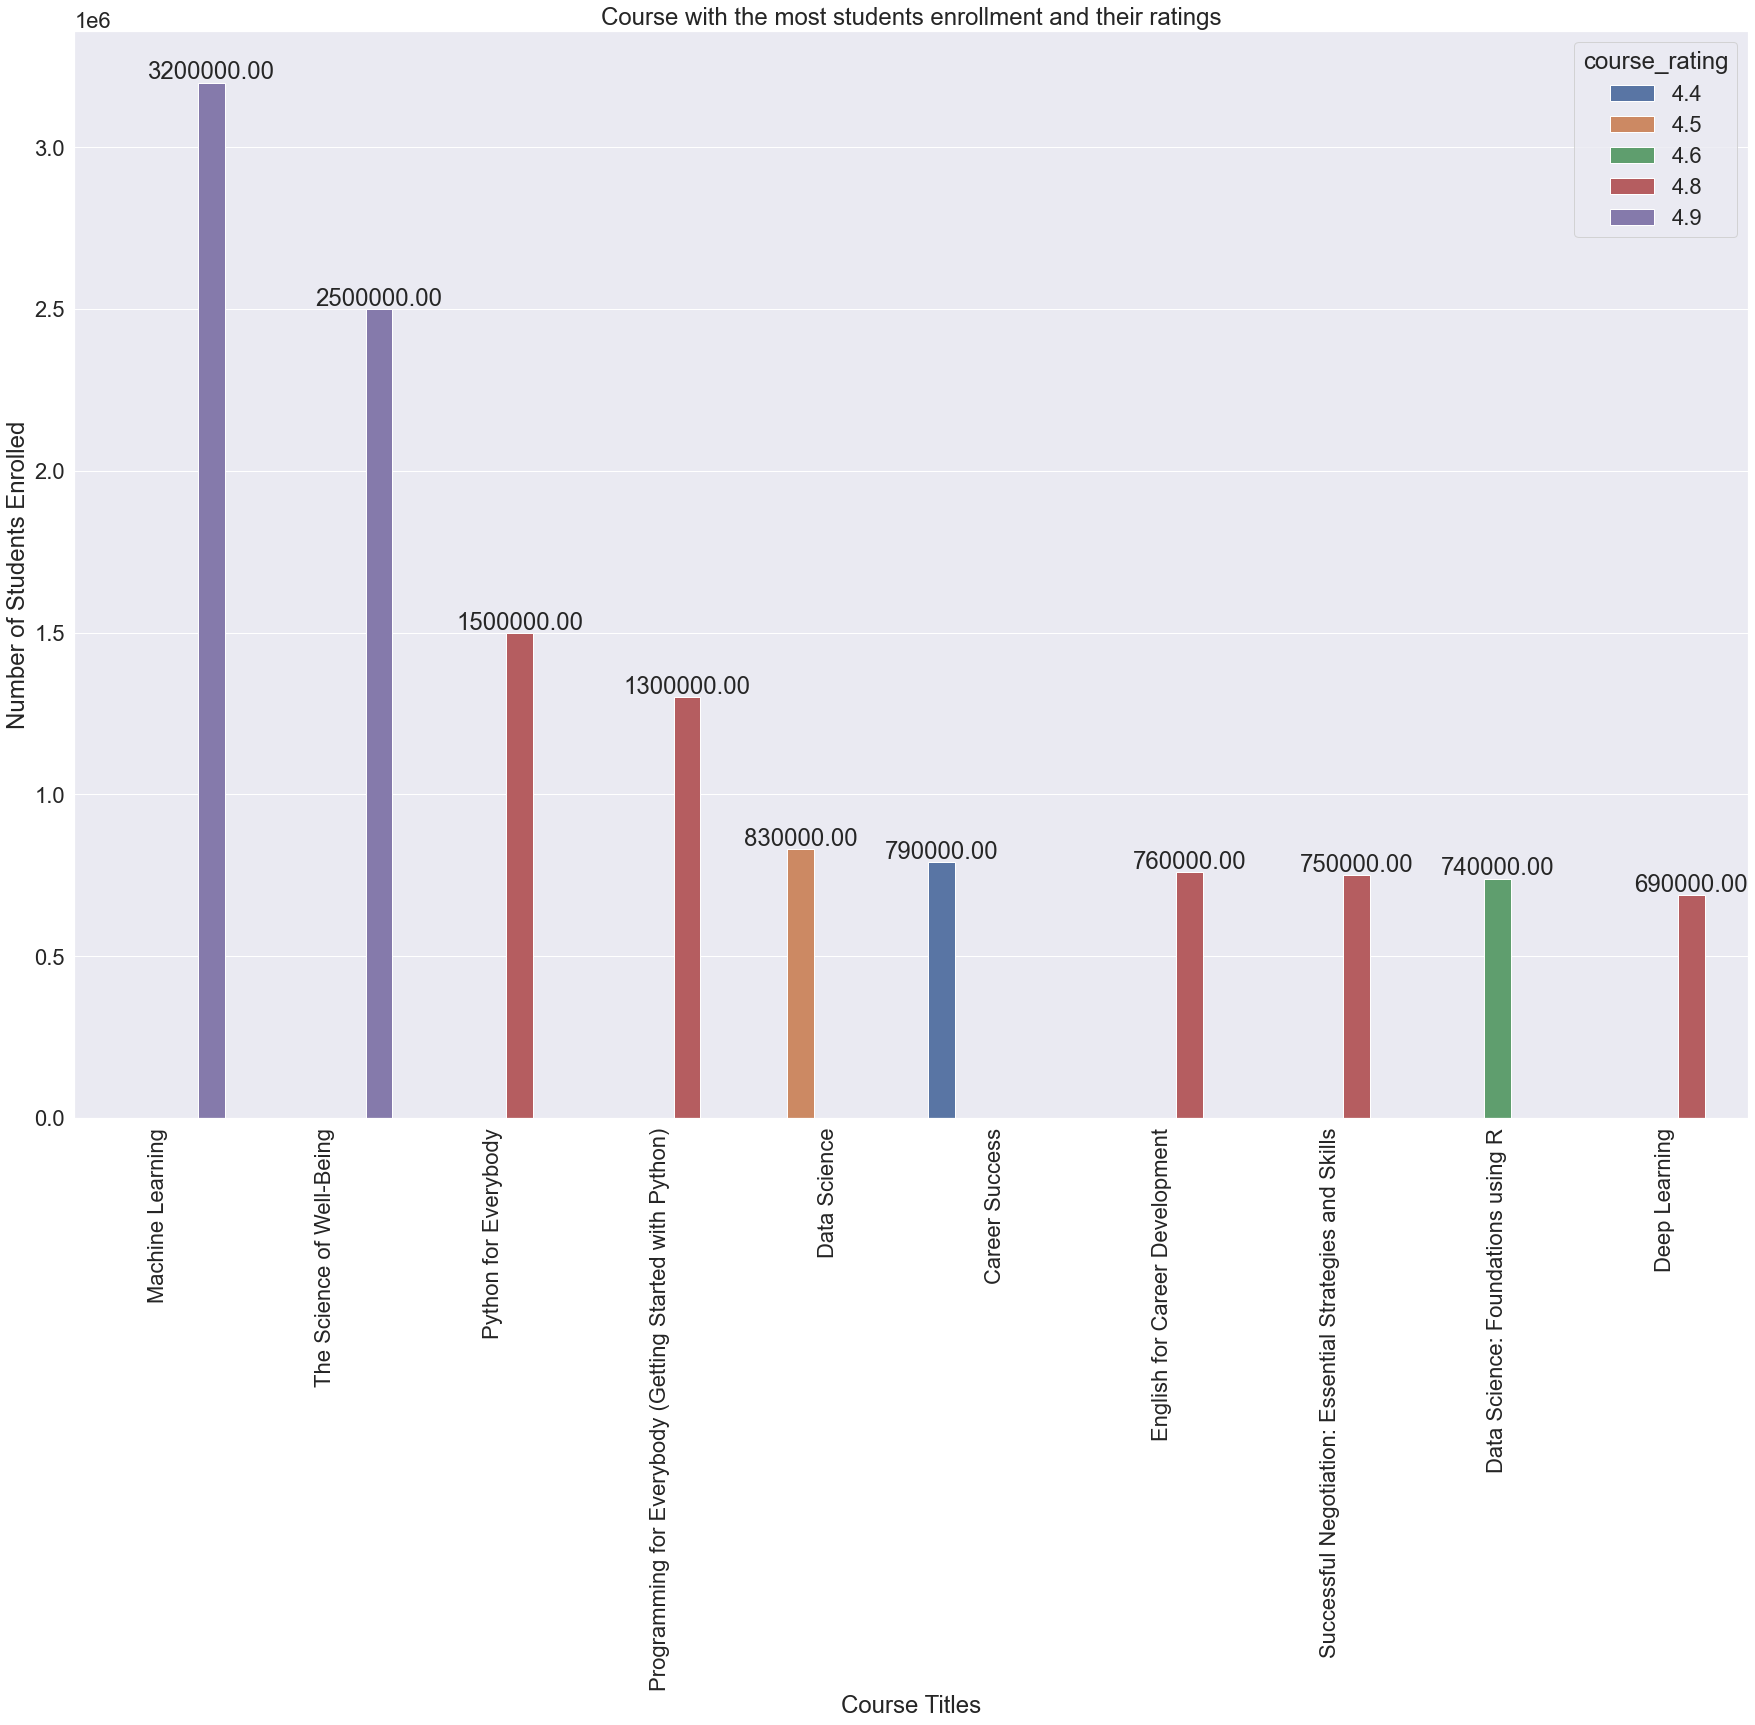

In [44]:
large=coursera_data.nlargest(10, ['course_students_enrolled'])


plt.figure(figsize=(30,20))
# sns.set_style(style='white') 
sns.set(font_scale = 2)
g = sns.barplot(x="course_title" ,y="course_students_enrolled",hue="course_rating",data=large)
plt.xlabel('Course Titles')
plt.xticks(rotation=90)
plt.ylabel('Number of Students Enrolled')
plt.title("Course with the most students enrollment and their ratings")


for p in g.patches:
    
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Does certificate type impact course rating?
Do professional certificates have a higher rating because they are accepted everywhere or is there still no impact?

In [45]:
rate_cert_dict = round(coursera_data.groupby('course_Certificate_type')['course_rating'].mean(), 1).to_dict()
rate_cert_dict = {k: v for k, v in sorted(rate_cert_dict.items(), key=lambda item: item[1], reverse=True)}
rate_cert_dict

{'COURSE': 4.7, 'PROFESSIONAL CERTIFICATE': 4.7, 'SPECIALIZATION': 4.6}

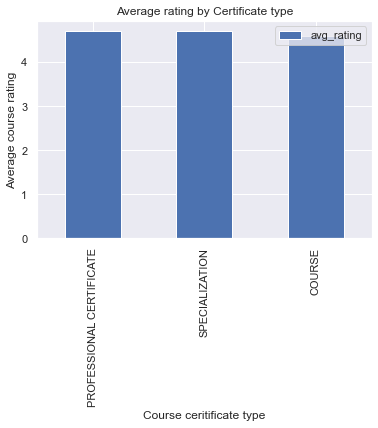

In [47]:
cert_df['avg_rating'] = list(rate_cert_dict.values())
cert_df.plot(kind='bar', x='course_Certificate_type', y='avg_rating', title='Average rating by Certificate type')
sns.set(font_scale = 1)
plt.xlabel('Course ceritificate type')
plt.ylabel('Average course rating')
plt.show();

Still, no difference.

### Number of students enrolled vs. course rating
Last but not the least, if there a large number of students enrolled in the course, does that impact the course rating?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


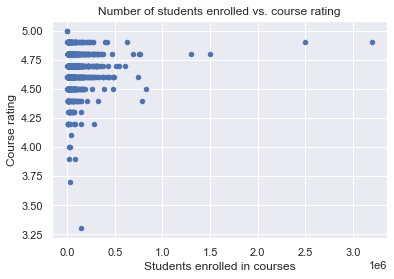

In [48]:
coursera_data.plot(kind='scatter', x='course_students_enrolled', y='course_rating', title='Number of students enrolled vs. course rating')
plt.ylabel('Course rating')
plt.xlabel('Students enrolled in courses')
plt.show()

There is a small datapoint at the bottom which says that less number of students meaning low rating, but this does not prove our assumption as there is no strong relation. We can check how strong is the relation by finding correlation between the two.

In [49]:
coursera_data.corr()

course_rating  course_students_enrolled
course_rating                   1.00000                   0.07109
course_students_enrolled        0.07109                   1.00000

We see that there is a very small positive correlation, hence its not enough to prove our assumption that more number of students enrolled in the course does lead to a higher rating.

# Improvements
* Use one hot (OHE) encoding to help analyse categorical variables by coverting them to numbers. 
* Provide more interactive visualizations after OHE. 
* Import data from other platforms and comparing them all.
* Improve data visualization by comparing with other platforms like edx or udemy. 

# Conclusion

* University of Pennsylvania has most number of courses on Coursera followed by University of Michigan.
* Organizations with more than 10 courses on Coursera are not present in the top 5 organizations list with the highest rating.
* There is no Computer Science course in the top 10 highest rated courses on Coursera.
* Course difficulty does affect the number of students enrolled. There are more students enrolled in Beginner and Mixed level of difficulty courses than Intermediate and Advanced.
* Course difficulty does not affect course rating.
* Course certificate type does impact the number of students enrolled in that course. More number of students tend to enroll for Professional Certificate courses than just "COURSE" certificate.
* Certificate type does not impact course rating.
* There is no strong relation to prove that if more number of students are enrolled in a course, the course rating is a higher.